In [158]:
import numpy as np # per operazioni numeriche.
from keras.datasets import mnist # per caricare il dataset.
from keras.models import Sequential # per costruire il modello sequenziale.
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D # per aggiungere strati al modello.
from keras.utils import to_categorical # per convertire le etichette in formato one-hot
import matplotlib.pyplot as plt  # per visualizzare i dati


In [ ]:
#carichiamo il dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


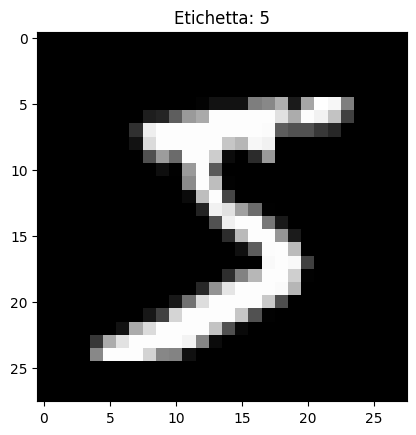

In [160]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Etichetta: {y_train[0]}')
plt.show()

In [ ]:
#Normalizziamo i dati
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255



In [ ]:
#Convertiamo l'immagine in un vettore di 784 elementi
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
#Converte le etichette in vettori binari per la classificazione multiclasse.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
#Creazione del modello
model = Sequential()

In [ ]:
#Aggiunta di strati per addestrare il modello
model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


c:\Users\loren\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModello compilato con successo.")

print("\nInizia l'addestramento del modello...")


Modello compilato con successo.

Inizia l'addestramento del modello...


In [ ]:
#Adddestramento del modello
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

print("\nAddestramento del modello completato. \nVisualizzo metriche di accuracy sul test set:\n")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.4630 - val_accuracy: 0.9660 - val_loss: 0.1211
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9634 - loss: 0.1160 - val_accuracy: 0.9733 - val_loss: 0.0844
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9759 - loss: 0.0751 - val_accuracy: 0.9732 - val_loss: 0.0928
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0581 - val_accuracy: 0.9737 - val_loss: 0.0915
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0462 - val_accuracy: 0.9760 - val_loss: 0.0901
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9760 - val_loss: 0.0906
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9790 - val_loss: 0.0810
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9920 - loss: 0.024

In [ ]:
#Valutazione del modello
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perdita sul test set: {test_loss:.4f}')
print(f'Accuratezza sul test set: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.9713 - loss: 0.1278
Perdita sul test set: 0.1064
Accuratezza sul test set: 0.9763


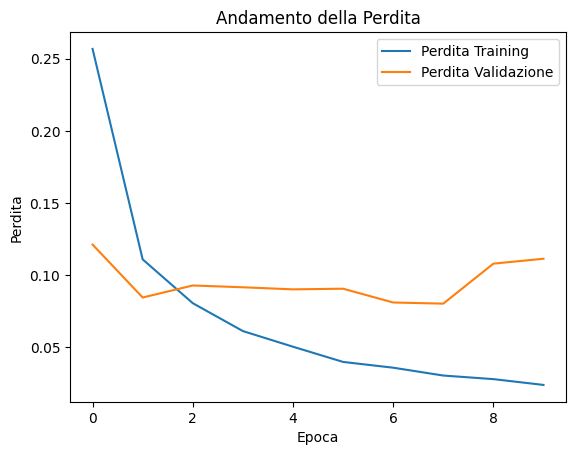

In [ ]:
#Grafico della perdita
plt.plot(history.history['loss'],
label='Perdita Training')
plt.plot(history.history['val_loss']
, label='Perdita Validazione')
plt.xlabel('Epoca')
plt.ylabel('Perdita')
plt.legend()
plt.title('Andamento della Perdita')
plt.show()


In [ ]:
#Predizioni sul test set
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


In [ ]:
#Conversione delle prediction in etichette
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

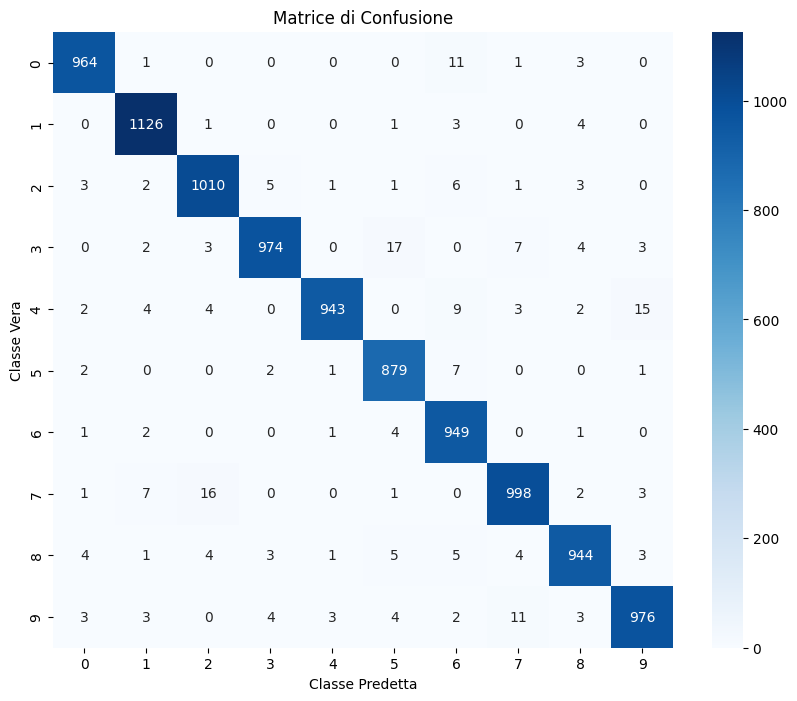

In [ ]:
#matrice di confusione
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.show()

In [174]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes)
print('Report di Classificazione:')
print(report)

Report di Classificazione:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.96      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.96      0.99      0.97       892
           6       0.96      0.99      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



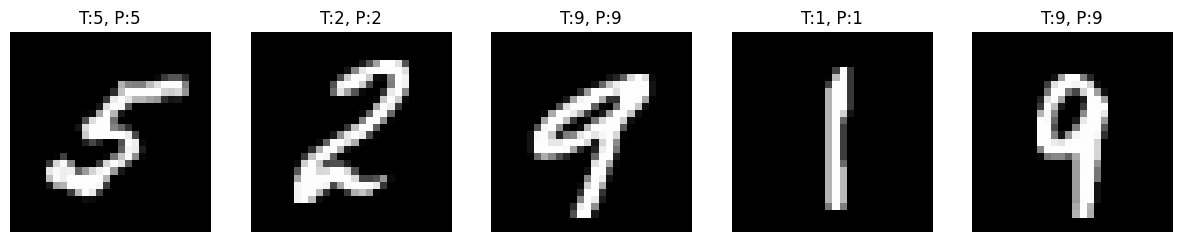

In [175]:
num_images = 5
random_indices = np.random.choice(len(X_test), num_images)
plt.figure(figsize=(15,3))
for i, idx in enumerate(random_indices):
    image = X_test[idx].reshape(28, 28)
    true_label = true_classes[idx]
    predicted_label = predicted_classes[idx]

    plt.subplot(1, num_images, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'T:{true_label}, P:{predicted_label}')
plt.show()